In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('Add_sales_data_2018.csv')

In [2]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [3]:
data.shape

(205, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [5]:
data.describe()


,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [6]:
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

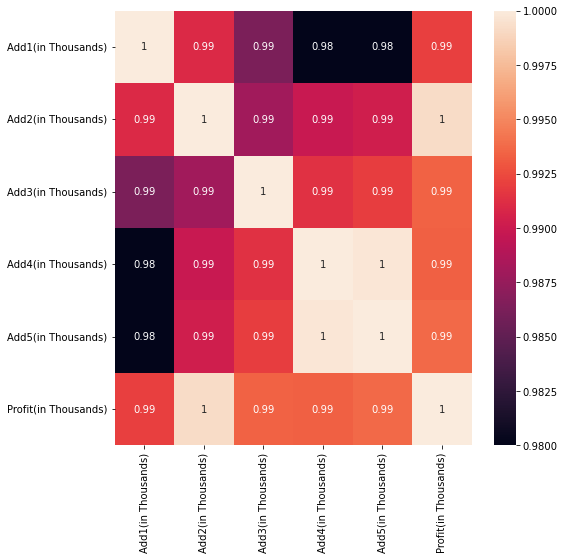

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),vmin=0.98,vmax=1,annot=True,)
plt.show()

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [8]:
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [9]:
#drop unnecessary columns
data1=data.drop("Date", axis=1)

y=data1['Profit(in Thousands)']
x=data1.drop(['Profit(in Thousands)'],axis=1)
#x=data1.loc[:,:"Add5(in Thousands)"]
print(x.columns)
print(x.shape)

Index(['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)',
       'Add4(in Thousands)', 'Add5(in Thousands)'],
      dtype='object')
(205, 5)


In [10]:
#splitting data to train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

print(x_train.shape)

lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)

prediction=model.predict(x_test)

print(prediction)

print("\n\nMSE IS:",mean_squared_error(y_test,prediction))

#print(model.coef_)
#print(model.intercept_)

#from sklearn.metrics import r2_score
#print("R2 value is ",r2_score(y_test,prediction))

(153, 5)
[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788 5038.222 5491.792 5019.997 4647.356 4486.38  4435.174 5300.437
 5425.19  4482.183 4193.095 6062.457]


MSE IS: 7.31736695719986e-25


MSE is very low and it implies that the prediction is almost accurate.

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement. 

In [11]:
new_vals=[[290,312,309,298,320]]
#res=pd.DataFrame(new_vals)
#print(res.info())

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)

prediction=model.predict(new_vals)

print("the prediction value for given set of data is",prediction)

the prediction value for given set of data is [5820.06]


In [ ]:
expected profit from the given set of amounts of advertisements is [5820.06] i